## dataset_plot

<Figure size 640x480 with 0 Axes>

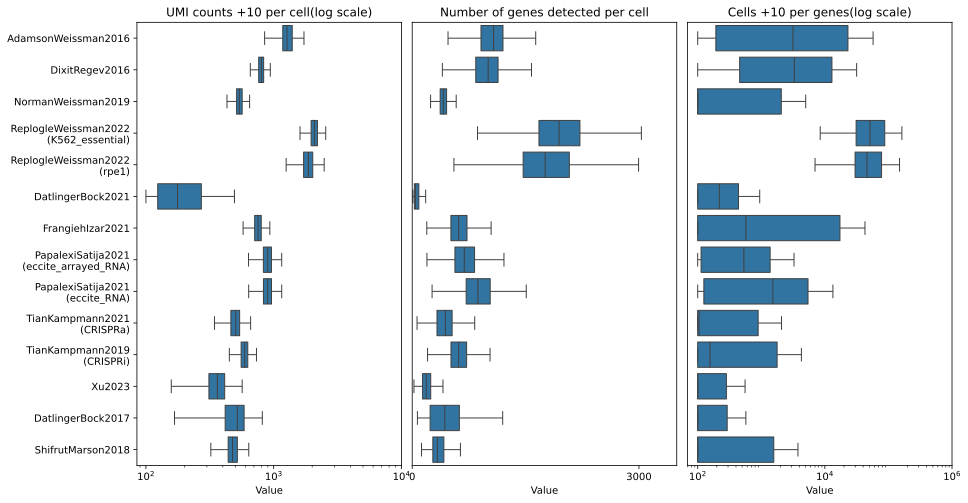

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)
file_path1 = 'updated_counts_data.csv'
data1 = pd.read_csv(file_path1)
data1['value'] = data1['value'].apply(lambda x: max(x, 100))

# 2
file_path2 = 'gene_counts.csv'
data2 = pd.read_csv(file_path2)
data2['value'] = data2['value'].str.replace(r'\[|\]', '', regex=True).astype(int)
data2['value'] = data2['value'].apply(lambda x: max(x, 10))

# 3
file_path3 = 'cells_per_gene.csv'
data3 = pd.read_csv(file_path3)
data3['value'] = data3['value'].apply(lambda x: max(x, 100))

def split_dataset_name(name):
    if '(' in name:
        return name.split('(')[0] + '\n(' + name.split('(')[1]
    else:
        return name

data1['dataset'] = data1['dataset'].apply(split_dataset_name)
data2['dataset'] = data2['dataset'].apply(split_dataset_name)
data3['dataset'] = data3['dataset'].apply(split_dataset_name)


fig = plt.figure(figsize=(16, 8))
gs = GridSpec(1, 4, width_ratios=[1, 4, 4, 4])

# dataset
ax0 = fig.add_subplot(gs[0])
ax0.axis('off')
ax0.set_yticks(range(len(data1['dataset'].unique())))
ax0.set_yticklabels(data1['dataset'].unique(), rotation=0, ha='right')

# panel_a
ax1 = fig.add_subplot(gs[1], sharey=ax0)
sns.boxplot(x='value', y='dataset', data=data1, orient='h', ax=ax1, showfliers=False)
ax1.set_xscale('log')
ax1.set_xticks([100, 1000, 10000])
ax1.set_xticklabels([r'$10^{2}$', r'$10^{3}$', r'$10^{4}$'])
ax1.set_title('UMI counts +10 per cell(log scale)')
ax1.set_xlabel('Value')
ax1.set_ylabel('')

# panel_b
ax2 = fig.add_subplot(gs[2], sharey=ax0)
sns.boxplot(x='value', y='dataset', data=data2, orient='h', ax=ax2, showfliers=False)
ax2.set_xlim(0, 3500)
ax2.set_xticks([0, 3000])
ax2.set_xticklabels(['0', '3000'])
ax2.set_title('Number of genes detected per cell')
ax2.set_xlabel('Value')
ax2.set_ylabel('')
ax2.yaxis.set_visible(False)  # 隐藏第二个子图的y轴标签

# panel_3
ax3 = fig.add_subplot(gs[3], sharey=ax0)
sns.boxplot(x='value', y='dataset', data=data3, orient='h', ax=ax3, showfliers=False)
ax3.set_xscale('log')
ax3.set_xticks([100, 10000, 1000000])
ax3.set_xticklabels([r'$10^{2}$', r'$10^{4}$', r'$10^{6}$'])
ax3.set_title('Cells +10 per genes(log scale)')
ax3.set_xlabel('Value')
ax3.set_ylabel('')
ax3.yaxis.set_visible(False)  # 隐藏第三个子图的y轴标签

#plt.tight_layout()
plt.subplots_adjust(wspace=0.05)

plt.savefig('combined_plots.pdf')
plt.show()
